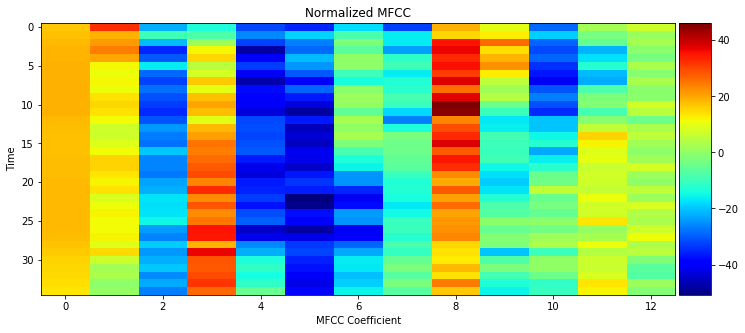

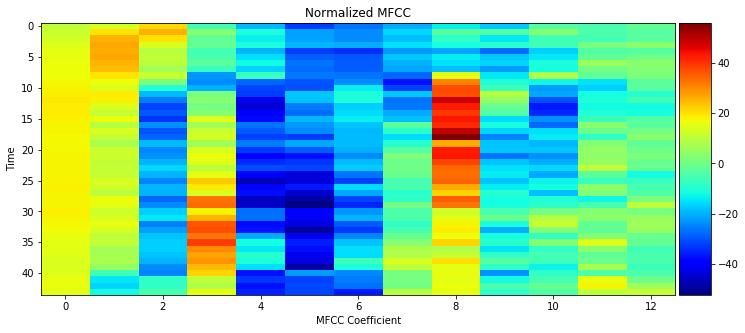

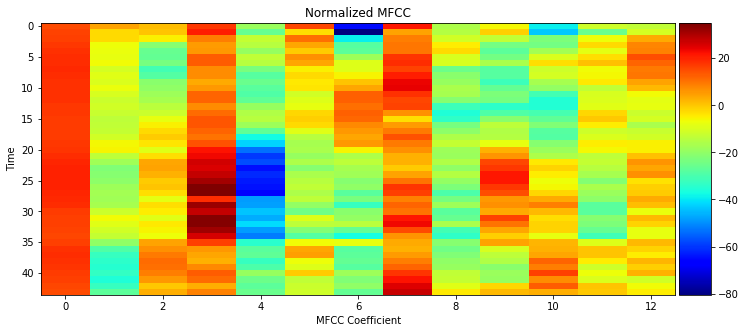

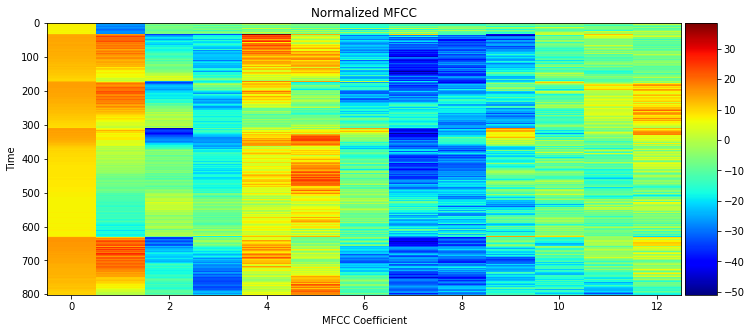

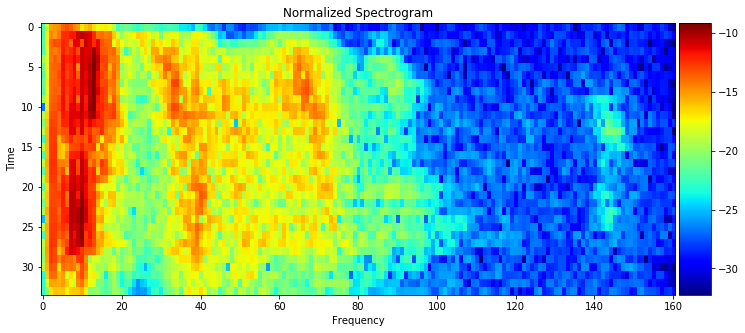

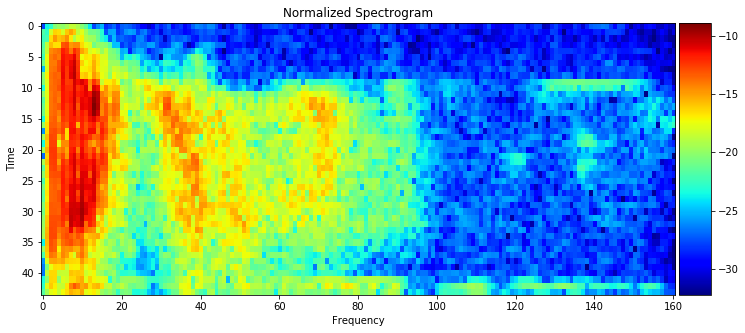

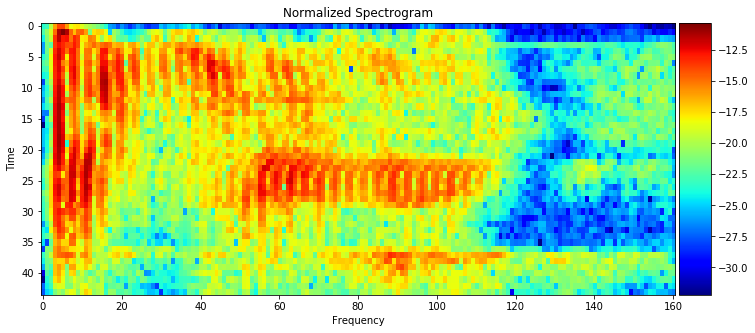

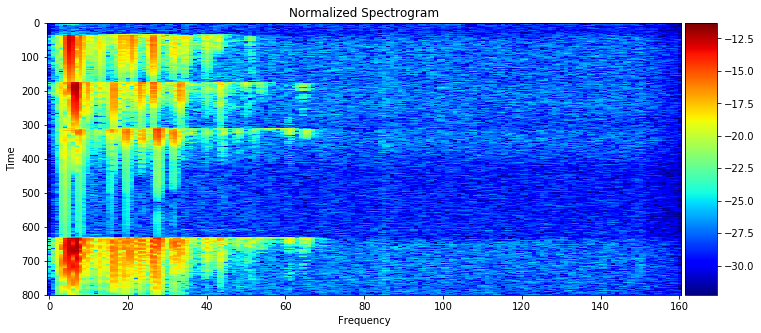

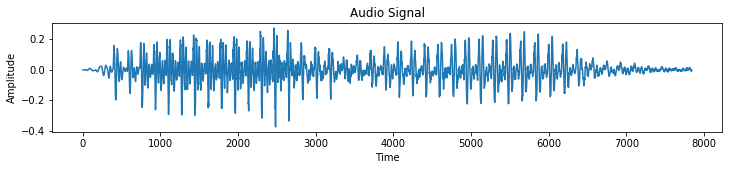

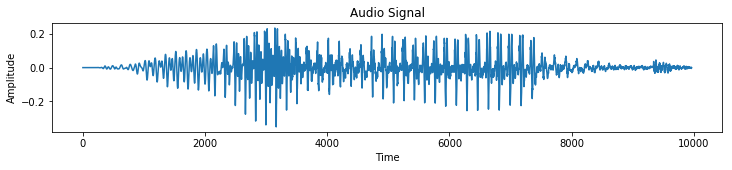

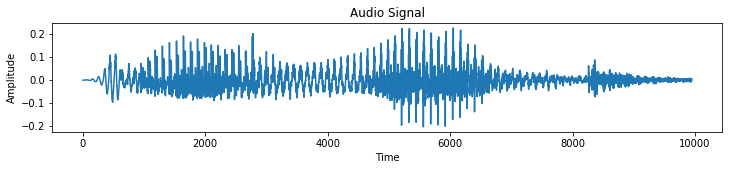

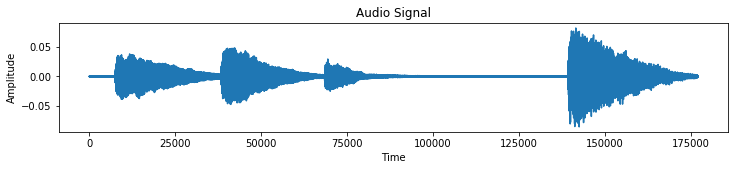

In [2]:
from IPython.display import Audio, display
from src.data_generator import plot_raw_audio, plot_spectrogram_feature, plot_mfcc_feature
import librosa
import matplotlib.pyplot as plt
import numpy as np
from src.utils import calc_feat_dim, spectrogram_from_file, text_to_int_sequence
from python_speech_features import mfcc
import scipy.io.wavfile as wav

def plot_raw(name):
    raw_audio = librosa.load("data/misc/blog-intro/" + name)[0]
    plot_raw_audio(raw_audio, size=(12,2))

def plot_spect(name):
    plot_spectrogram_feature(spectrogram_from_file("data/misc/blog-intro/" + name))

def plot_mfcc(name):
    (rate, sig) = wav.read("data/misc/blog-intro/" + name)
    plot_mfcc_feature(mfcc(sig, rate, numcep=13))

plot_mfcc("speaker1_1.wav")
plot_mfcc("speaker1_2.wav")
plot_mfcc("speaker2_1.wav")
plot_mfcc("chord.wav")

plot_spect("speaker1_1.wav")
plot_spect("speaker1_2.wav")
plot_spect("speaker2_1.wav")
plot_spect("chord.wav")

plot_raw("speaker1_1.wav")
plot_raw("speaker1_2.wav")
plot_raw("speaker2_1.wav")
plot_raw("chord.wav")

In [10]:
from src.train import train
from src.models import model_2
from src.char_map import char_map, index_map
from src.predict import predict_raw, predict
import numpy as np

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=1,
                number_of_layers=5,
                output_dim=len(char_map)+1)
model.load_weights('models/model_2.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         338250    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         375750    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000      
__________

In [28]:
predict(0, 'train', model)
_,_,_,raw_pred = predict_raw(0, 'train', model)
raw_pred_char = np.vstack([sorted(char_map.keys(), key=lambda k: char_map[k]) + ['BLANK'], raw_pred[0]])

Truth: ያንደኛ ደረጃ ትምህርታቸው ን ጐንደር ተ ም ረዋል
Predicted: ያንደኛ ደጃት ምርታቸው ቆንዳር ተምረዋል
wer: 10


In [29]:
np.savetxt("data/misc/blog-intro/tr_1_tr01001.pred.csv", raw_pred_char, delimiter=",", fmt="%s")